# Line Coding Techniques (Hat Kodlama Teknikleri)

This Jupyter Notebook defines methods for simulating line coding techniques over a given bit sequence. The following line coding techniques are implemented:
- Unipolar NRZ (non-return-to-zero)
- Polar NRZ-L (non-return-to-zero-level)
- Polar RZ (return-to-zero)
- Polar Biphase-M (Manchester/IEEE 802.3)
- Polar Biphase-S (Differential Manchester)
- Bipolar AMI (alternate mark inversion)
- Bipolar Pseudoternary

Bu Jupyter not defterinde, verilen bir bit dizisi için hat kodlama tekniklerini simüle eden metotlar tanımlanmıştır. Yukarıdaki hat kodlama teknikleri gerçeklenmiştir.

- `data_string_to_array` function checks the given bit sequence string and converts it to a bit array.
- `get_wave` function takes the given bit array, bit rate and voltage level and decorates a given encoding function.
- `show_wave` function takes the t-w axis values and graph properties and plots the graph.

---

- `data_string_to_array` fonksiyonu, verilen bit sekans string'ini kontrol eder ve bit dizisine dönüştürür.
- `get_wave` fonksiyonu, kullanıcıdan alınan bit dizisi, bit oranı ve voltaj seviyesini alır ve verilen bir kodlama fonksiyonunu dekore eder.
- `show_wave` fonksiyonu, verilen t-w eksen değerleri ve grafik özelliklerini alır ve grafik çizer.

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def data_string_to_array(bit_data: str) -> [int]:
    data = []
    for bit in bit_data:
        if bit != '0' and bit != '1':
            raise ValueError("Data must be binary")
        data.append(int(bit))
    return data

def get_wave(encoding, binary_sequence: str, bitrate: int, voltage_level: int) -> (np.ndarray, np.ndarray):
    if binary_sequence == "":
        raise ValueError("Binary sequence cannot be empty")
    if bitrate <= 0:
        raise ValueError("Bitrate must be a positive integer")
    data = data_string_to_array(binary_sequence)
    duration = len(data) / bitrate
    return encoding(data, duration, bitrate, voltage_level)

def show_plot(t: np.ndarray, w: np.ndarray, title: str, x_label: str, y_label: str,
              lim: ((float, float), (float, float)), grid: bool = True):
    plt.step(t, w, where='post', color='b', linewidth=2)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(np.arange(lim[0][0], lim[0][1], 1.0))
    plt.xlim(lim[0])
    plt.ylim(lim[1])
    plt.grid(grid)
    plt.show()



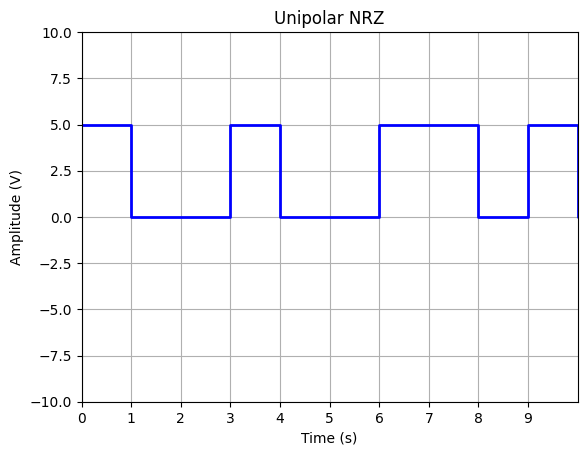

In [125]:
def unipolar_nrz(data: [int], duration: int, bitrate: int, voltage_level: int) -> (np.ndarray, np.ndarray):
    t = np.linspace(0, duration, len(data), endpoint=False)
    w = np.zeros_like(t)
    for i, bit in enumerate(data):
        w[i] = voltage_level * bit
    return t, w

t, w = get_wave(unipolar_nrz, "100100110101", 1, 5)
show_plot(t, w, 'Unipolar NRZ', 'Time (s)', 'Amplitude (V)', ((0, 10), (-10, 10)))

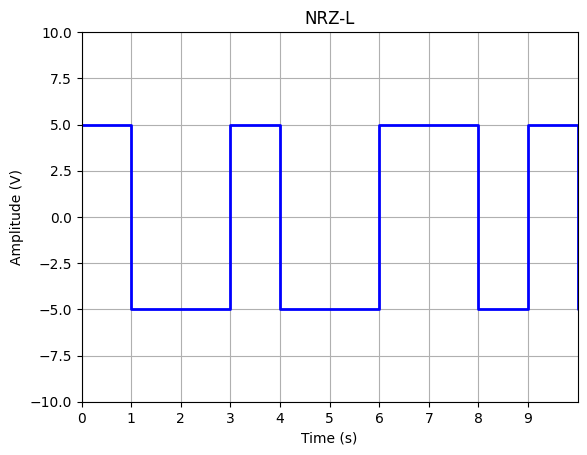

In [126]:
def nrz_l(data: [int], duration: int, bitrate: int, voltage_level: int):
    t = np.linspace(0, duration, len(data), endpoint=False)
    w = np.zeros_like(t)
    for i, bit in enumerate(data):
        w[i] = voltage_level * (bit if bit == 1 else -1)
    return t, w

t, w = get_wave(nrz_l, "100100110101", 1, 5)
show_plot(t, w, 'NRZ-L', 'Time (s)', 'Amplitude (V)', ((0, 10), (-10, 10)))

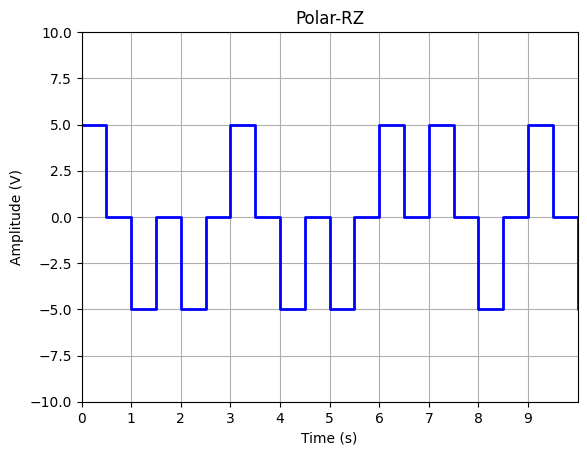

In [127]:
def polar_rz(data: [int], duration: int, bitrate: int, voltage_level: int):
    t = np.linspace(0, duration, len(data) * 2, endpoint=False)
    w = np.zeros_like(t)
    for i, bit in enumerate(data):
        if bit == 1:
            w[i*2] = voltage_level
            w[i*2+1] = 0
        else:
            w[i*2] = -voltage_level
            w[i*2+1] = 0
    return t, w

show_plot(*get_wave(polar_rz, "100100110101", 1, 5), 'Polar-RZ', 'Time (s)', 'Amplitude (V)', ((0, 10), (-10, 10)))

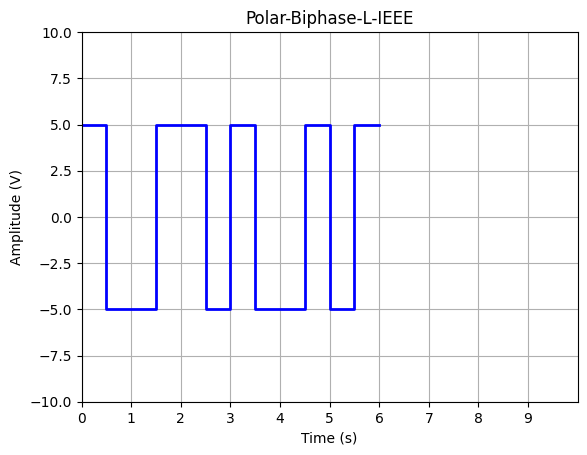

In [128]:
def polar_biphase_l_ieee(data: [int], duration: int, bitrate: int, voltage_level: int):
    t = np.linspace(0, duration, len(data) * 2 + 1, endpoint=True)
    w = np.zeros_like(t)
    for i, bit in enumerate(data):
        if bit == 1:
            w[i * 2] = -voltage_level
            w[i * 2 + 1] = voltage_level
        else:
            w[i * 2] = voltage_level
            w[i * 2 + 1] = -voltage_level
        if i == len(data) - 1:
            w[i * 2 + 2] = w[i * 2 + 1]
    return t, w

t, w = get_wave(polar_biphase_l_ieee, "010011", 1, 5)
show_plot(t, w, 'Polar-Biphase-L-IEEE', 'Time (s)', 'Amplitude (V)', ((0, 10), (-10, 10)))

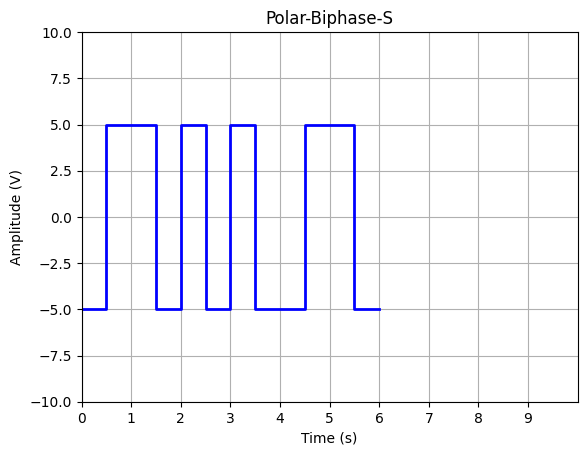

In [129]:
def polar_biphase_s(data: [int], duration: int, bitrate: int, voltage_level: int):
    t = np.linspace(0, duration, len(data) * 2 + 1, endpoint=True)
    w = np.zeros_like(t)
    for i, bit in enumerate(data):
        if i == 0:
            w[i * 2] = voltage_level if bit == 1 else -voltage_level
            w[i * 2 + 1] = -voltage_level if bit == 1 else voltage_level
        else:
            w[i * 2] = w[i * 2 - 2] if bit == 0 else w[i * 2 - 1]
            w[i * 2 + 1] = w[i * 2 - 1] if bit == 0 else w[i * 2 - 2]
        if i == len(data) - 1:
            w[i * 2 + 2] = w[i * 2 + 1]
    return t, w

t, w = get_wave(polar_biphase_s, "010011", 1, 5)
show_plot(t, w, 'Polar-Biphase-S', 'Time (s)', 'Amplitude (V)', ((0, 10), (-10, 10)))

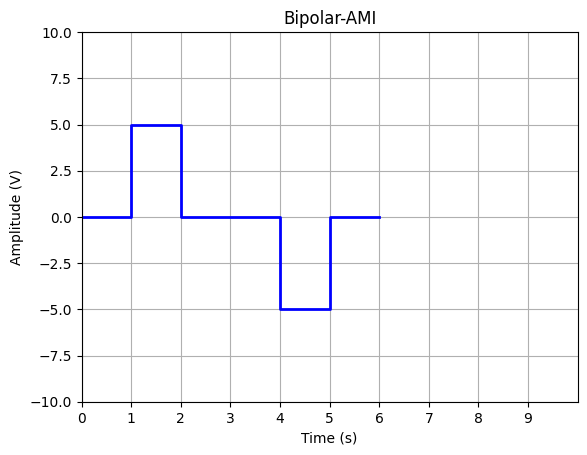

In [130]:
def bipolar_ami(data: [int], duration: int, bitrate: int, voltage_level: int):
    t = np.linspace(0, duration, len(data) + 1, endpoint=True)
    w = np.zeros_like(t)
    last_one = -voltage_level
    for i, bit in enumerate(data):
        if bit == 1:
            w[i] = -last_one
            last_one = voltage_level
        else:
            w[i] = 0
    return t, w

t, w = get_wave(bipolar_ami, "010010", 1, 5)
show_plot(t, w, 'Bipolar-AMI', 'Time (s)', 'Amplitude (V)', ((0, 10), (-10, 10)))

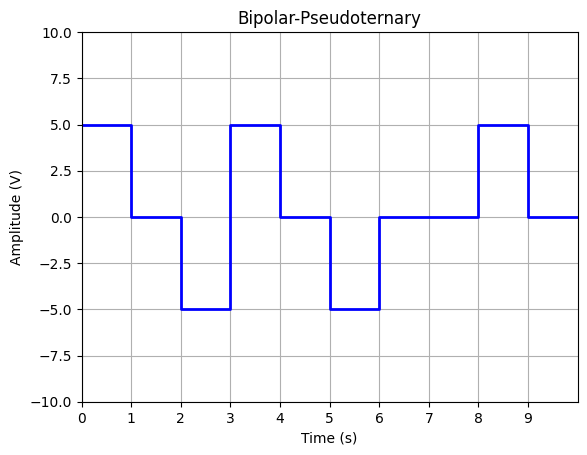

In [131]:
def bipolar_pseudoternary(data: [int], duration: int, bitrate: int, voltage_level: int) -> (np.ndarray, np.ndarray):
    t = np.linspace(0, duration, len(data) + 1, endpoint=True)
    w = np.zeros_like(t)
    last_zero = -voltage_level
    for i, bit in enumerate(data):
        if bit == 0:
            w[i] = -last_zero
            last_zero = -last_zero
        else:
            w[i] = 0
    return t, w

t, w = get_wave(bipolar_pseudoternary, "0100101101", 1, 5)
show_plot(t, w, 'Bipolar-Pseudoternary', 'Time (s)', 'Amplitude (V)', ((0, 10), (-10, 10)))